<a href="https://colab.research.google.com/github/sekhrianchal6/Arima/blob/main/Muhsin%2087.85%25_Optimized_bagging%20_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sekhrianchal6/Arima/main/Maternal%20Health%20Risk%20Data%20Set.csv')

In [4]:
df['RiskLevel'].replace({"high risk": "3", "mid risk": "2", "low risk" : "1"}, inplace=True)
df['RiskLevel'] = df['RiskLevel'].astype(float)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0


In [ ]:
#df with duplicates
dfwd = df.copy()

In [ ]:
#df of only duplicates
dfd = df.loc[df.duplicated(),:]


In [ ]:
# df without duplicates
dfwnd = df.drop_duplicates()

In [ ]:
print(f"data with duplicates: {len(dfwd)}\ndata without duplicates: {len(dfwnd)}\ndata of only duplicates entries: {len(dfd)}")

data with duplicates: 1014
data without duplicates: 452
data of only duplicates entries: 562


[0.0251167  0.04159796 0.02754001 0.08482034 0.02028523 0.01452332
 0.78611644]


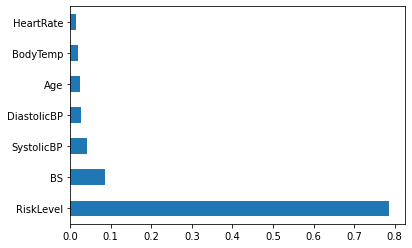

In [5]:
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [6]:
df.drop(['DiastolicBP', 'HeartRate', 'BodyTemp'],  axis='columns', inplace=True)

df.head()

,Age,SystolicBP,BS,RiskLevel
0,25,130,15.0,3.0
1,35,140,13.0,3.0
2,29,90,8.0,3.0
3,30,140,7.0,3.0
4,35,120,6.1,1.0


((760, 4), (254, 4))

In [15]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf_1 = BaggingClassifier(
                        n_estimators=10, random_state=0).fit(X, y)
y_pred = clf_1.predict(X)

In [20]:
from sklearn.model_selection import train_test_split
X_values = df.drop('RiskLevel', axis=1)
y_values = df['RiskLevel']
X_train,X_test,y_train,y_test = train_test_split(X_values,y_values,
                                                 test_size=0.20,random_state= 42)
clf_1 = BaggingClassifier(
                        n_estimators=10, random_state=0).fit(X, y)



In [21]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = clf_1
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.1872 degrees.
Accuracy = 87.85%.
